In [1]:
!pip install import-ipynb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.2 MB/s eta 0:00:00


**STEP1: Load google-drive, and libraries**

In [ ]:
# Mounting google drive if it is already not mounted
def LoadGoogleDrive(googleDriveDir):
  # Link Google Drive
  import os
  # Check if Google Drive is already mounted
  if not os.path.exists(googleDriveDir + "/MyDrive"):
      print("Mounting Google Drive...")
      from google.colab import drive
      drive.mount(googleDriveDir)
  else:
      print("Google Drive is already mounted!")

from google.colab import drive
googleDriveFolder = "/content/drive"
LoadGoogleDrive(googleDriveFolder)

Mounting Google Drive...
Mounted at /content/drive


In [ ]:
import sys
import import_ipynb

# 1. Set path to the directory where mylib.ipynb is located
lib_path = '/content/drive/MyDrive/Colab Notebooks/P_HINTS6/lib'
sys.path.append(lib_path)
# 2. Change current working directory to that path
%cd "$lib_path"

# 3. Now import the notebook
from app_lib import *


/content/drive/MyDrive/Colab Notebooks/P_HINTS6/lib


**STEP2: Load data**

In [ ]:
ip_file_path = googleDriveFolder + "/MyDrive/Colab Notebooks/P_HINTS6/op_data/models_metric_summary.xlsx"
ip_sheet_name = 'models_metric_summary'
df_orig = load_data(verbose_level=1, ip_file_path=ip_file_path, ip_sheet_name=ip_sheet_name)


Ip File Path: /content/drive/MyDrive/Colab Notebooks/P_HINTS6/op_data/models_metric_summary.xlsx
 SheetName: models_metric_summary
df_orig.shape: (7, 20)


In [ ]:
df = df_orig.copy()

In [ ]:
df.head(9)

,ModelName,Best_F1_Thres,Accuracy,AUC-ROC,Precision_Class0,Precision_Class1,Precision_MacroAvg,Precision_WeightedAvg,Recall_Class0,Recall_Class1,Recall_MacroAvg,Recall_WeightedAvg,F1-score_Class0,F1-score_Class1,F1-score_MacroAvg,F1-score_WeightedAvg,Support_Class0,Support_Class1,Support_MacroAvg,Support_WeightedAvg
0,lr,0.20,0.78,0.80,0.96,0.25,0.61,0.90,0.79,0.70,0.74,0.78,0.87,0.37,0.62,0.82,883,90,973,973
1,rf,0.19,0.71,0.76,0.95,0.19,0.57,0.88,0.71,0.67,0.69,0.71,0.82,0.30,0.56,0.77,883,90,973,973
2,tabnet,0.26,0.84,0.76,0.94,0.27,0.60,0.88,0.88,0.43,0.66,0.84,0.91,0.33,0.62,0.85,883,90,973,973
3,saint,0.12,0.73,0.79,0.96,0.21,0.59,0.89,0.73,0.71,0.72,0.73,0.83,0.33,0.58,0.79,883,90,973,973
4,xgb,0.29,0.83,0.78,0.94,0.27,0.61,0.88,0.87,0.48,0.67,0.83,0.90,0.35,0.63,0.85,883,90,973,973
5,tabpfn,0.11,0.81,0.81,0.96,0.28,0.62,0.90,0.82,0.68,0.75,0.81,0.89,0.40,0.64,0.84,883,90,973,973
6,se,0.13,0.83,0.81,0.95,0.29,0.62,0.89,0.86,0.58,0.72,0.83,0.90,0.39,0.64,0.85,883,90,973,973


In [ ]:
# Select key metrics for comparison
comparison_columns = [
    "ModelName", "Accuracy", "AUC-ROC",
    "Precision_WeightedAvg", "Recall_WeightedAvg", "F1-score_WeightedAvg"
]

comparison_df = df[comparison_columns].sort_values(by="Accuracy", ascending=False)
print(comparison_df)


  ModelName  Accuracy  AUC-ROC  Precision_WeightedAvg  Recall_WeightedAvg  \
2    tabnet      0.84     0.76                   0.88                0.84   
6        se      0.83     0.81                   0.89                0.83   
4       xgb      0.83     0.78                   0.88                0.83   
5    tabpfn      0.81     0.81                   0.90                0.81   
0        lr      0.78     0.80                   0.90                0.78   
3     saint      0.73     0.79                   0.89                0.73   
1        rf      0.71     0.76                   0.88                0.71   

   F1-score_WeightedAvg  
2                  0.85  
6                  0.85  
4                  0.85  
5                  0.84  
0                  0.82  
3                  0.79  
1                  0.77  


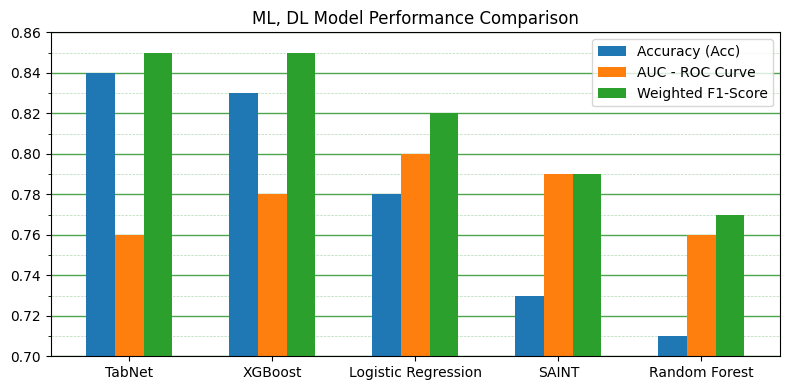

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Choose models to display
models_to_show = ["lr", "rf", "tabnet", "saint", "xgb"]

# Choose metrics to display
metrics_to_show = ["Accuracy", "AUC-ROC", "F1-score_WeightedAvg"]

# Custom legend names for each metric
legend_labels = {
    "Accuracy": "Accuracy (Acc)",
    "AUC-ROC": "AUC - ROC Curve",
    "F1-score_WeightedAvg": "Weighted F1-Score"
}

# Filter DataFrame
filtered_df = comparison_df[comparison_df["ModelName"].isin(models_to_show)]

# Keep only selected metrics
plot_df = filtered_df.set_index("ModelName")[metrics_to_show]

# Sort models by their highest metric value (descending)
plot_df = plot_df.loc[plot_df.max(axis=1).sort_values(ascending=False).index]

# Rename columns for legend
plot_df = plot_df.rename(columns=legend_labels)

# Colors
color_map = {
    "Accuracy (Acc)": "#1f77b4",      # blue
    "AUC - ROC Curve": "#ff7f0e",     # orange
    "Weighted F1-Score": "#2ca02c"    # green
}
colors = [color_map[col] for col in plot_df.columns]

# Mapping for full model names
model_label_map = {
    "se": "Stacking Ensemble",
    "tabpfn": "TabPFN",
    "xgb": "XGBoost",
    "lr": "Logistic Regression",
    "tabnet": "TabNet",
    "saint": "SAINT",
    "rf": "Random Forest"
}

# Plot
ax = plot_df.plot(kind="bar", figsize=(8, 4), color=colors, width=0.6)
ax.margins(x=0.02)

# Replace x-axis labels
xticks = ax.get_xticks()
xlabels = [model_label_map.get(x, x) for x in plot_df.index]
ax.set_xticks(xticks, xlabels, rotation=0)

# Remove axis labels
ax.set_xlabel("")
ax.set_ylabel("")

# Title
plt.title("ML, DL Model Performance Comparison")

# Y-axis limits
data_min = float(plot_df.min().min())
data_max = float(plot_df.max().max())
pad = max(0.01, 0.02 * (data_max - data_min))
ymin = float(np.floor((data_min - pad) / 0.02) * 0.02)
ymax = float(np.ceil((data_max + pad) / 0.02) * 0.02)
ax.set_ylim(ymin, ymax)

# Ticks
ax.set_yticks(np.arange(ymin, ymax + 1e-9, 0.02))
ax.set_yticks(np.arange(ymin, ymax + 1e-9, 0.01), minor=True)

# Grid
ax.set_axisbelow(True)
ax.yaxis.grid(True, which='major', linestyle='-',  color='green', linewidth=1.0, alpha=0.7)
ax.yaxis.grid(True, which='minor', linestyle='--', color='green', linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()
